In [1]:
#                                             HOUSING PRICE PREDICTION MODEL

In [2]:
#NAME: SUMEET GAIROLA   KUSHAL RANGA   AASTHA BHARDWAJ                                                                     DATE: 13/11/19

In [3]:
#IMPORTING LIBRARIES

In [4]:
from sklearn.metrics import r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sklearn
import time
import sys
import os

In [5]:
#IGNORING WARNINGS

In [6]:
DeprecationWarning('ignore')
warnings.filterwarnings('ignore')

In [7]:
#READING "train_housing.csv" IN df VARIABLE

In [8]:
df=pd.read_csv("train_housing.csv")

In [9]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=0)
del df

In [10]:
#CHECKING FOR NULL VALUES AND FREQUENCY

In [11]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       212
LotArea             0
Street              0
Alley            1097
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          6
MasVnrArea          6
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       551
GarageType         58
GarageYrBlt        58
GarageFinish       58
GarageCars          0
GarageArea          0
GarageQual         58
GarageCond         58
PavedDrive

In [12]:
column=train.columns
for col in column:
    if train[col].isnull().sum()>0:
        print(col,train[col].isnull().sum())

LotFrontage 212
Alley 1097
MasVnrType 6
MasVnrArea 6
BsmtQual 28
BsmtCond 28
BsmtExposure 28
BsmtFinType1 28
BsmtFinType2 29
Electrical 1
FireplaceQu 551
GarageType 58
GarageYrBlt 58
GarageFinish 58
GarageQual 58
GarageCond 58
PoolQC 1164
Fence 954
MiscFeature 1119


In [13]:
#USING GRAPHS FOR BETTER OBSERVATION OF FEATURES HAVING NULL VALUES

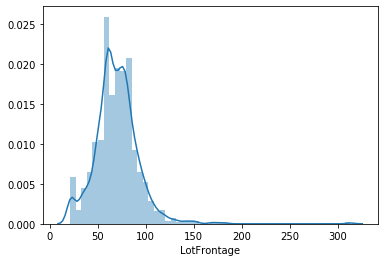

In [14]:
sns.distplot(train.LotFrontage.dropna())

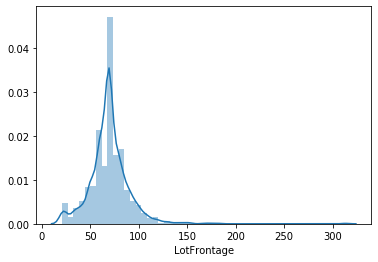

In [15]:
sns.distplot(train.LotFrontage.fillna(train.LotFrontage.median(),inplace=False))

In [16]:
train['MasVnrType'].value_counts()

None       701
BrkFace    338
Stone      112
BrkCmn      11
Name: MasVnrType, dtype: int64

In [17]:
train['Alley'].value_counts()

Grvl    37
Pave    34
Name: Alley, dtype: int64

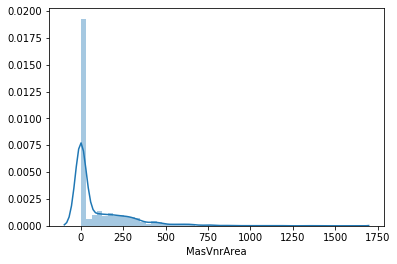

In [18]:
sns.distplot(train.MasVnrArea.dropna())

In [19]:
train['BsmtQual'].value_counts()

TA    528
Gd    490
Ex     94
Fa     28
Name: BsmtQual, dtype: int64

In [20]:
train['BsmtExposure'].value_counts()

No    768
Av    174
Gd    106
Mn     92
Name: BsmtExposure, dtype: int64

In [21]:
train['BsmtCond'].value_counts()

TA    1046
Gd      55
Fa      37
Po       2
Name: BsmtCond, dtype: int64

In [22]:
train['Fireplaces'].value_counts()

0    551
1    522
2     92
3      3
Name: Fireplaces, dtype: int64

In [23]:
train['FireplaceQu'].value_counts()

Gd    295
TA    257
Fa     29
Ex     19
Po     17
Name: FireplaceQu, dtype: int64

In [24]:
train['Electrical'].value_counts()

SBrkr    1060
FuseA      82
FuseF      22
FuseP       2
Mix         1
Name: Electrical, dtype: int64

In [25]:
train['BsmtFinType1'].value_counts()

Unf    353
GLQ    330
ALQ    172
BLQ    123
Rec    106
LwQ     56
Name: BsmtFinType1, dtype: int64

In [26]:
train['BsmtFinType2'].value_counts()

Unf    1003
LwQ      42
Rec      39
BLQ      30
ALQ      14
GLQ      11
Name: BsmtFinType2, dtype: int64

In [27]:
train['GarageType'].value_counts()

Attchd     696
Detchd     315
BuiltIn     74
Basment     14
2Types       6
CarPort      5
Name: GarageType, dtype: int64

In [28]:
train['Fence'].value_counts()

MnPrv    113
GdPrv     51
GdWo      43
MnWw       7
Name: Fence, dtype: int64

In [29]:
train['MiscFeature'].value_counts()

Shed    45
Gar2     2
Othr     2
Name: MiscFeature, dtype: int64

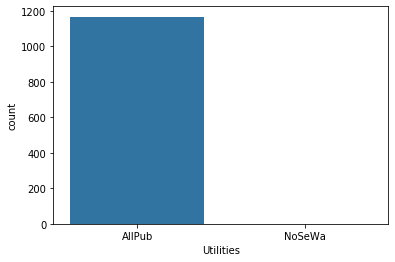

In [30]:
sns.countplot(x=train['Utilities'])

In [31]:
train['Utilities'].value_counts()

AllPub    1167
NoSeWa       1
Name: Utilities, dtype: int64

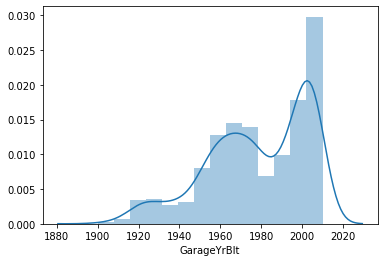

In [32]:
sns.distplot(train.GarageYrBlt.dropna())

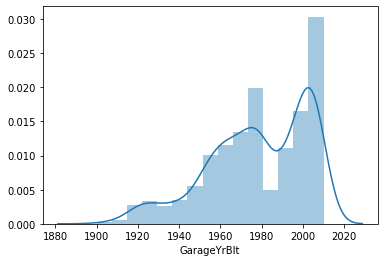

In [33]:
sns.distplot(train.GarageYrBlt.fillna(train.GarageYrBlt.median()))

In [34]:
train.GarageYrBlt.median()

1979.0

In [35]:
#DEFINING FUNCTION TO HANDLE NULL VALUES 

In [36]:
def drop(train):
    train['LotFrontage'].fillna(train.LotFrontage.median(),inplace=True)
    train['MasVnrType'].fillna("NoClass",inplace=True)
    train['Alley'].fillna("No Class",inplace=True)
    train['BsmtQual'].fillna("Na",inplace=True)
    train['BsmtCond'].fillna("Na",inplace=True)
    train['BsmtExposure'].fillna("Na",inplace=True)
    train['BsmtFinType1'].fillna("Na",inplace=True)
    train['BsmtFinType2'].fillna("Na",inplace=True)
    train['MiscFeature'].fillna("Na",inplace=True)
    train['PoolQC'].fillna("Na",inplace=True)
    train['FireplaceQu'].fillna("Na",inplace=True)
    train['GarageFinish'].fillna("Na",inplace=True)
    train['GarageType'].fillna("Na",inplace=True)
    train['GarageYrBlt'].fillna(train.GarageYrBlt.median(),inplace=True)
    train['GarageQual'].fillna("Na",inplace=True)
    train['GarageCond'].fillna("Na",inplace=True)
    train['Fence'].fillna("Na",inplace=True)
    train['MasVnrArea'].fillna(0.0,inplace=True)
    train['Electrical'].fillna("No Class",inplace=True)
    train.drop(['Utilities'], axis=1)
    return train

In [37]:
#CALLING FUNCTION TO HANDLE NULL VALUES

In [38]:
train=drop(train)

In [39]:
#USING labelEncoder to convert string values to integer values

In [40]:
from sklearn.preprocessing import LabelEncoder

def labels(train):
    cat=train.select_dtypes(include=object)
    for col in cat.columns:
        label=LabelEncoder()
        train[col]=label.fit_transform(train[col])
    return train

In [41]:
train=labels(train)

In [42]:
def x_and_y(train):
    x=train.drop(['SalePrice'],axis=1)
    y=train['SalePrice']
    return x,y
x_train,y_train=x_and_y(train)

In [43]:
#TRAINING MODEL ON TRAINING DATA

In [44]:
model=RandomForestRegressor(n_estimators=1000,random_state=2)
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [45]:
prediction=model.predict(x_train)
prediction

array([318695.453, 107149.213, 151028.825, ..., 125888.294, 217435.781,
       219690.989])

In [46]:
#CHECKING FOR ACCURACY ON TRAINING PART OF TRAIN DATA

In [47]:
score=r2_score(y_train,prediction)
score

0.9807168079705835

In [48]:
#CLEANING TEST PART OF TRAIN DATA

In [49]:
test=drop(test)
test=labels(test)
x_test,y_test=x_and_y(test)

In [50]:
prediction_test=model.predict(x_test)

In [51]:
#CHECKING FOR ACCURACY ON TEST PART OF TRAIN DATA

In [52]:
score_test=r2_score(y_test,prediction_test)
score_test

0.8427145682468256

In [53]:
#CLEANING TEST DATA TO USE IN MODEL FOR PREDICTION OF HOUSING PRICES

In [54]:
df=pd.read_csv("test_housing.csv")

In [55]:
column=df.columns
for col in column:
    if df[col].isnull().sum()>0:
        print(col,df[col].isnull().sum())

MSZoning 4
LotFrontage 227
Alley 1352
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1


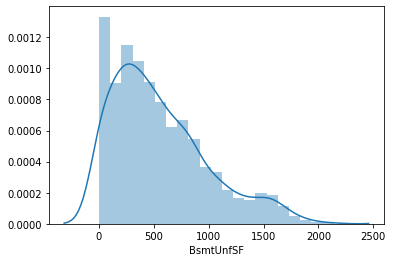

In [56]:
sns.distplot(df.BsmtUnfSF.dropna())

In [57]:
df.BsmtUnfSF.median()

460.0

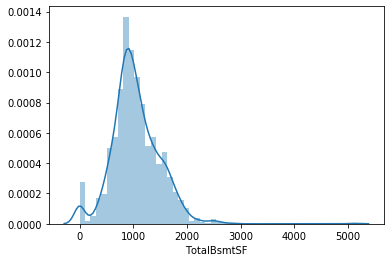

In [58]:
sns.distplot(df.TotalBsmtSF.dropna())

In [59]:
df.TotalBsmtSF.median()

988.0

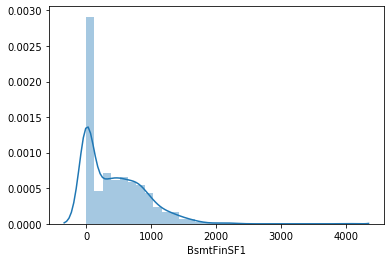

In [60]:
sns.distplot(df.BsmtFinSF1.dropna())

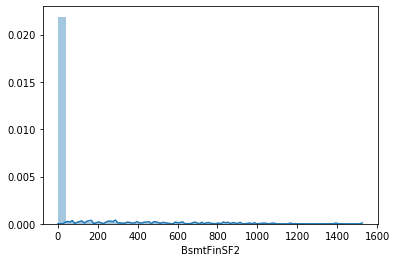

In [61]:
sns.distplot(df.BsmtFinSF2.dropna())

In [62]:
df['BsmtFullBath'].value_counts()

0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64

In [63]:
df['BsmtHalfBath'].value_counts()

0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64

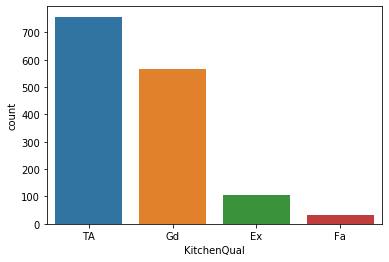

In [64]:
sns.countplot(df.KitchenQual.dropna())

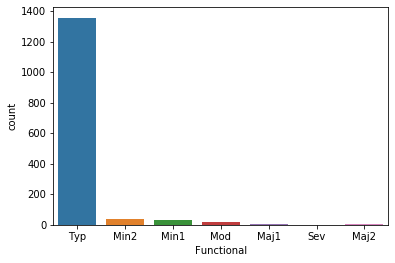

In [65]:
sns.countplot(df.Functional.dropna())

In [66]:
df['GarageCars'].value_counts()

2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64

In [67]:
df['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
ConLI       4
Oth         4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [68]:
def drop_test(df):
    df['Utilities'].fillna("AllPub",inplace=True)
    df['LotFrontage'].fillna(train.LotFrontage.median(),inplace=True)
    df['MSZoning'].fillna("NoClass",inplace=True)
    df['Alley'].fillna("Na",inplace=True)
    df['Exterior1st'].fillna("NoClass",inplace=True)
    df['Exterior2nd'].fillna("NoClass",inplace=True)
    df['MasVnrType'].fillna("NoClass",inplace=True)
    df['MasVnrArea'].fillna(0.0,inplace=True)
    df['BsmtQual'].fillna("Na",inplace=True)
    df['BsmtCond'].fillna("Na",inplace=True)
    df['BsmtExposure'].fillna("Na",inplace=True)
    df['BsmtFinType1'].fillna("Na",inplace=True)
    df['BsmtFinType2'].fillna("Na",inplace=True)
    df['BsmtFinSF2'].fillna(0.0,inplace=True)
    df['BsmtFinSF1'].fillna(0.0,inplace=True)
    df['BsmtUnfSF'].fillna(460,inplace=True)
    df['TotalBsmtSF'].fillna(988,inplace=True)
    df['BsmtFullBath'].fillna(0.0,inplace=True)
    df['BsmtHalfBath'].fillna(0.0,inplace=True)
    df['FireplaceQu'].fillna("Na",inplace=True)
    df['GarageFinish'].fillna("Na",inplace=True)
    df['GarageType'].fillna("Na",inplace=True)
    df['GarageYrBlt'].fillna(0,inplace=True)
    df['GarageQual'].fillna("Na",inplace=True)
    df['GarageArea'].fillna(0.0,inplace=True)
    df['GarageCond'].fillna("Na",inplace=True)
    df['Fence'].fillna("Na",inplace=True)
    df['MiscFeature'].fillna("Na",inplace=True)
    df['PoolQC'].fillna("Na",inplace=True)
    df['KitchenQual'].fillna("TA",inplace=True)
    df['Functional'].fillna("Typ",inplace=True)
    df['GarageCars'].fillna(2.0,inplace=True)
    df['SaleType'].fillna("NoClass",inplace=True)
    
    return df

In [69]:
df=drop_test(df)
df=labels(df)

In [70]:
prediction_test=model.predict(df)

In [71]:
#PREDICTING HOUSING PRICES 

In [72]:
prediction_test

array([123443.469, 153389.575, 179618.364, ..., 150272.327, 109303.011,
       228871.307])